# Binary Tree

Full Tree = Each node have have zero or two node.
Perfect = All nodes have two nodes except leaf
Complete = All nodes have zero, one or two tree

# Binary Search Tree

Left child value always less than parent
Right child value always grater than parent 

Number of node in Binary search tree = 2^n - 1

###  Time complexity of BST

**Average case** 
- Search node complexity = O(log n)
- Remove node complexity = O(log n)
- Add node complexity = O(log n)

O(log n) is divide and conquer

**Worst case (When tree having only left or right childs)**
- Search node complexity = O(n)
- Remove node complexity = O(n)
- Add node complexity = O(n)

### Delete node

Delete node from tree with both left and right child

- Find max from left subtree and copy to node to be deleted
- Find min from right subtree and copy to node to be deleted


In [30]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if value == temp.value:
                return False
            elif value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else:
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def insert_recursive(self, value):
        if self.root is None:
            self.root =  Node(value)
            return True
        else:
            self.__insert(self.root, value)
    
    # this approach is better
    def __insert(self, node, value):
        if value == node.value:
                return False
        elif value < node.value:
            if node.left is None:
                node.left = Node(value)
                return True
            else:
                self.__insert(node.left, value)
        else:
            if node.right is None:
                node.right = Node(value)
                return True
            else:
                self.__insert(node.right, value)

    def insert_recursive_approach2(self, value):
        if self.root is None:
            self.root =  Node(value)
        else:
            self.__insert_approach2(self.root, value)

    def __insert_approach2(self, current_node, value):
        if current_node == None:
            return Node(value)
        if value < current_node.value:
            current_node.left = self.__insert_approach2(current_node.left, value)
        if value > current_node.value:
            current_node.right = self.__insert_approach2(current_node.right, value)
        return current_node

    def contains(self, value):
        temp = self.root
        while temp is not None:
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False
                    

    def contains_recursive(self, value):
        return self.__contains(self, value)
        
    def __contains(self, node, value):
        if node is None:
            return False

        if value < node.value:
            self.__contains(node.left, value)
        elif value > node.value:
            self.__contains(node.right, value)
        else:
            return True
        
    def inorder_traversal(self):
        print('---Inordered Traversal----')
        self.__inorder_traversal(self.root)
    
    def __inorder_traversal(self, node):
        if node is not None:
            self.__inorder_traversal(node.left)
            print(node.value)
            self.__inorder_traversal(node.right)
    
    def max(self):
        if self.root is None:
            return None
        head = self.root
        while head.right is not None:
            head = head.right
        return head.value
    
    def min(self):
        if self.root is None:
            return None
        head = self.root
        while head.left is not None:
            head = head.left
        return head.value
    
    def delete(self, value):
        if self.root is None:
            return None
        return self.__delete(self.root, value)

    def __delete(self, node, value):
        if node is None:
            return None
        if value > node.value:
            node.right = self.delete(node.right, value)
        elif value < node.value:
            node.left = self.delete(node.left, value)
        else:
            if node.left == None:
                return node.right
            elif node.right == None:
                return node.left
            mini = self.min(node.right)
            node.data = mini.data
            node.right = self.__delete(node.right, mini.data)


    def breadth_first_search(self):
        current_node = self.root
        queue = []
        results = []
        queue.append(current_node)
        while len(queue) > 0:
            current_node = queue.pop(0)
            results.append(current_node.value)
            if current_node.left is not None:
                queue.append(current_node.left)
            if current_node.right is not None:
                queue.append(current_node.right)
        return results
    
    def depth_first_search_preorder(self):
        results=[]
        self.__traverse_preorder(self.root, results)
        return results
    
    def __traverse_preorder(self,current_node, results):
        results.append(current_node.value)
        if current_node.left is not None:
            self.__traverse_preorder(current_node.left, results)
        if current_node.right is not None:
            self.__traverse_preorder(current_node.right, results)

    def depth_first_search_postorder(self):
        results=[]
        self.__traverse_postorder(self.root, results)
        return results
    
    def __traverse_postorder(self,current_node, results):
        if current_node.left is not None:
            self.__traverse_postorder(current_node.left, results)
        if current_node.right is not None:
            self.__traverse_postorder(current_node.right, results)
        results.append(current_node.value)


    def depth_first_search_inorder(self):
        results=[]
        self.__traverse_inorder(self.root, results)
        return results
    
    def __traverse_inorder(self,current_node, results):
        if current_node.left is not None:
            self.__traverse_inorder(current_node.left, results)
        
        results.append(current_node.value)

        if current_node.right is not None:
            self.__traverse_inorder(current_node.right, results)

        



my_tree = BinarySearchTree()
my_tree.insert(47)
my_tree.insert(21)
my_tree.insert_recursive(76)
my_tree.insert(18)
my_tree.insert(27)
my_tree.insert_recursive(52)
my_tree.insert(82)

# my_tree.inorder_traversal()

# print(f"Maximum: {my_tree.max()}")

print(my_tree.breadth_first_search())
print(my_tree.depth_first_search_preorder())
print(my_tree.depth_first_search_postorder())
print(my_tree.depth_first_search_inorder())


[47, 21, 76, 18, 27, 52, 82]
[47, 21, 18, 27, 76, 52, 82]
[18, 27, 21, 52, 82, 76, 47]
[18, 21, 27, 47, 52, 76, 82]


# AVL Tree

Height balanced tree , +1, 0, -1 height considered as balanaced

###  Time complexity of BST Tree
**Worst case (When tree having only left or right childs)**
- Search node complexity = O(n)
- Remove node complexity = O(n)
- Add node complexity = O(n)

AVL is another form of BST with its height self balanced

**Height = Height of left subtree - Height of right subtree**

###  Time complexity of AVL Tree

**Average case** 
- Search node complexity = O(log n)
- Remove node complexity = O(log n)
- Add node complexity = O(log n)

**Worst case (When tree having only left or right childs)**
- Search node complexity = O(log n)
- Remove node complexity = O(log n)
- Add node complexity = O(log n)

### Rotations
**LL Imbalancing** 

Height = 2-0 = +2

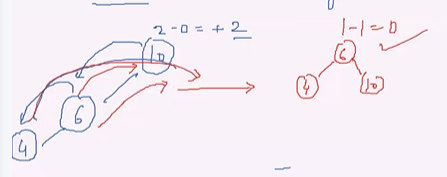

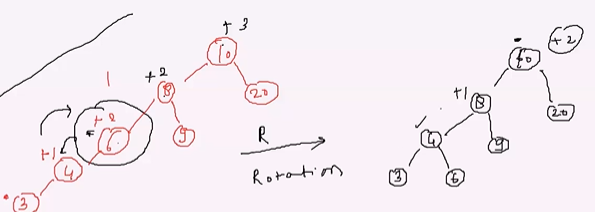

Right rotation

**RR Imbalancing**

Height = 0-2 = -2

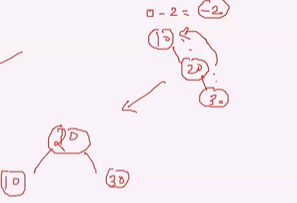

Left rotation





In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
